Adam Pfister  
Thinkful Capstone 1  
April 2019  
Mass Shootings in America: 1966-2017 

--------------------------------------------------------------------------

This dataset was downloaded from kaggle.com. It uses data from public sources including Wikipedia, Mother Jones, Stanford, and USA Today.  
  
CONTENTS 

Geography: United States of America

Time period: 1966-2017

Unit of analysis: Mass Shooting Attacks

Variables: The dataset contains Title, Location, Date, Summary, Fatalities, Injured, Total Victims, Mental Health Issue, Race, Gender, Age, and Lat-Long information.

----------------------------------------------------------------

There is no single legal definition of a mass shooting. One strict definition used in the past by the federal government says at least four victims must be killed in one incident. Much broader criteria requires at least four victims be injured in one incident, though not necessarily killed. Other definitions land somewhere in the middle. It is also unclear whether the injury or death of the shooter(s) count in the definition. This dataset includes some instances where zero people were killed and three were injured in one incident. Because of this, some people could argue that this data may be biased by including incidents that do not qualify as mass shootings. 

---------------------------------------------------------------------

ANALYTICAL QUESTIONS

1. What is the overall trend in mass shootings?
2. Is there a typical shooter profile: age, race, gender, mental illness?
3. Is there a correlation between a state's gun laws (loose or strict) and the amount of shootings that have occurred in those states? Do strict gun laws prevent mass shootings compared to states with loose gun laws?

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import dataset

mass = pd.read_csv(r'Mass Shootings Dataset Version 5.csv')

In [3]:
# General info about the dataset

mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 23 columns):
S#                      323 non-null int64
Title                   323 non-null object
Location                278 non-null object
Date                    323 non-null object
Incident Area           261 non-null object
Open/Close Location     295 non-null object
Target                  318 non-null object
Cause                   246 non-null object
Summary                 323 non-null object
Fatalities              323 non-null int64
Injured                 323 non-null int64
Total victims           323 non-null int64
Policeman Killed        317 non-null float64
Age                     179 non-null float64
Age 1                   179 non-null float64
Avg Age                 178 non-null float64
Employeed (Y/N)         67 non-null float64
Employed at             41 non-null object
Mental Health Issues    323 non-null object
Race                    321 non-null object
Gender          

In [22]:
# Check NaN values in dataframe

mass.isnull().sum()

Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Age 1                   144
Avg Age                 145
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
Year                      0
Gender_updated            0
City                     45
State                    45
dtype: int64

In [23]:
# Drop NaN values in dataframe

mass.dropna(inplace=True)

In [4]:
# Drop unecessary/irrelevant columns

mass.drop(['S#'],inplace=True,axis=1)
mass.drop(['Employeed (Y/N)'],inplace=True,axis=1)
mass.drop(['Employed at'],inplace=True,axis=1)

In [24]:
# List first three rows of dataset

mass.head(3)

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,...,Avg Age,Mental Health Issues,Race,Gender,Latitude,Longitude,Year,Gender_updated,City,State
322,University of Texas at Austin,"Austin, Texas",8/1/1966,University of Texas,Close,random,terrorism,"On August 1, 1966, a 25-year-old engineering s...",17,32,...,25.0,Yes,White,Male,30.198887,-97.844159,1966,Male,Austin,Texas
321,Rose-Mar College of Beauty,"Mesa, Arizona",11/12/1966,Rose-Mar College of Beauty,Close,random,terrorism,"On November 12, 1966, an 18-year-old high scho...",5,1,...,18.0,Yes,White,Male,33.422687,-111.816320,1966,Male,Mesa,Arizona
318,Clara Barton Elementary School,"Chicago, Illinois",1/17/1974,Clara Barton Elementary School,Close,Teachers,anger,"On January 17, 1974, a 14-year-old student ent...",1,3,...,14.0,Yes,Unknown,Male,41.839280,-87.688181,1974,Male,Chicago,Illinois


In [25]:
# Split date column and add year column

mass['Year'] = [np.int(i.split('/')[2]) for i in mass['Date']]

In [26]:
# Summary statistics on fatalities, injured, total victims, and avergage age of shooter

mass.loc[:, ['Fatalities', 'Injured', 'Total victims', 'Avg Age']].describe()

,Fatalities,Injured,Total victims,Avg Age
count,109.000000,109.000000,109.000000,109.000000
mean,5.853211,10.844037,16.330275,32.334862
std,7.073458,50.753612,56.277430,13.248350
min,0.000000,0.000000,3.000000,12.000000
25%,2.000000,1.000000,4.000000,20.000000
50%,5.000000,3.000000,7.000000,32.000000
75%,7.000000,6.000000,11.000000,43.000000
max,59.000000,527.000000,585.000000,70.000000


In [59]:
mass = mass.sort_values(by=['Year'])

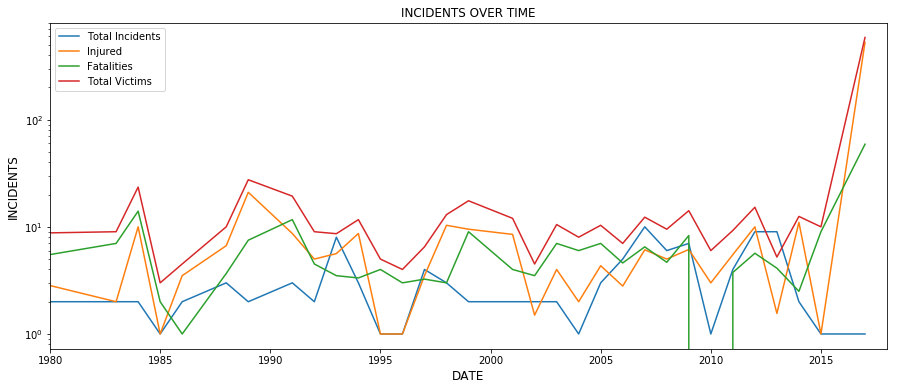

In [71]:
# Overall trend in incidents 1980-2017 in 5-year increments

plt.figure(figsize=(15,6))
mass['Year'].value_counts().sort_index(ascending=True).plot(label='Total Incidents')
mass.groupby('Year').mean()['Injured'].plot()
mass.groupby('Year').mean()['Fatalities'].plot()
mass.groupby('Year').mean()['Total victims'].plot(label='Total Victims')

plt.title('INCIDENTS OVER TIME', fontsize=12)
plt.xlabel('DATE', fontsize=12)
plt.ylabel('INCIDENTS', fontsize=12)
plt.yscale('log')
plt.xlim(1980, 2018)
plt.xticks(list(range(1980, 2020, 5)))
plt.legend()
plt.show()

This chart shows the overall trend of mass shooting incidents over time. The data seems to show that there has been a significant increase in injuries, fatalities, and total victims from mass shootings since around 2014, while total incidents has remained relatively stable over the last 35 years. This could potentially be because of the person compiling the dataset changing the definition of a mass shooting over time. For example, they could have included incidents in which X amount of injuries occurred since 2010 but excluded those same incidents in prior years. 

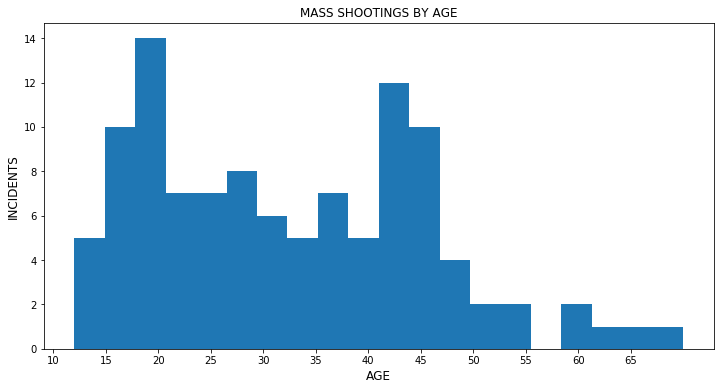

Mean age:  32.3348623853211
Median age:  32.0
Variance:  175.51877336051646
Standard deviation:  13.248349835376347
Standard error:  1.2631274329166204


In [73]:
# Incidents by age

plt.figure(figsize=(12,6))
plt.hist(mass['Avg Age'], bins=20)
plt.xticks(list(range(10, 70, 5)))
plt.xlabel('AGE', fontsize=12)
plt.ylabel('INCIDENTS', fontsize=12)
plt.title('MASS SHOOTINGS BY AGE', fontsize=12)
plt.show()

print("Mean age: ", mass['Avg Age'].mean())
print("Median age: ", mass['Avg Age'].median())
print("Variance: ", mass['Avg Age'].var())
print("Standard deviation: ", mass['Avg Age'].std())
print("Standard error: ", (np.std(mass['Avg Age']) / np.sqrt(len(mass['Avg Age']))))

This chart shows us that most mass shootings are committed by people between the ages of 15 and 45. The highest rate of incidents are committed by people around the age of 20 and drops off sharply after the age of 45-50. The mean and median age of a typical shooter is 32 years old. Variance is high at 175.

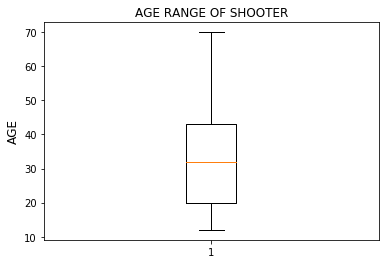

In [86]:
# Boxplot of average ages of shooters

plt.boxplot(mass['Avg Age'])
plt.title('AGE RANGE OF SHOOTER', fontsize=12)
plt.ylabel('AGE', fontsize=12)
plt.show()

This boxplot shows the age range of mass shooters. The bulk of mass shootings occur by people between the age 20-45. The orange line shows the median age of a shooter at 32. The oldest shooter is about 70 years old, and the youngest looks to be in their early teens.

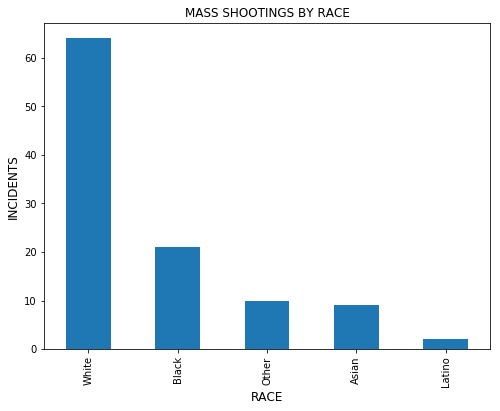

White     64
Black     21
Other     10
Asian      9
Latino     2
Name: Race, dtype: int64


In [37]:
# Attacks by race top five

# Combine/clean race categories
mass.Race.replace(['white', 'black', 'Some other race', 'unclear'],
                ['White', 'Black', 'Other','Unknown'], inplace=True)
mass.Race.replace(['White American or European American', 'Black American or African American', 'Asian American'], 
               ['White', 'Black', 'Asian'], inplace=True)

race = mass['Race'].value_counts()
race = race.head(5)
plt.figure(figsize=(8,6))
race.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.xlabel('RACE', fontsize=12)
plt.ylabel('INCIDENTS', fontsize=12)
plt.title('MASS SHOOTINGS BY RACE', fontsize=12)
plt.show()

print(race)

This chart shows that whites and blacks commit the majority of shootings, with whites outnumbering blacks 64 to 21. According to the data whites are 3 times more likely to commit a shooting than blacks. However, this data is not normalized to population size, which could potentially yield different results.

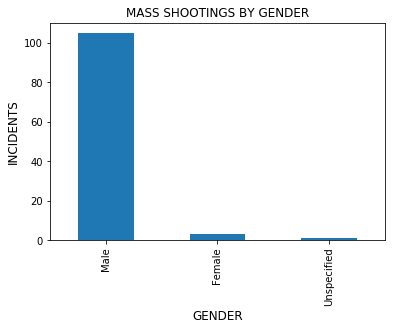

Male           105
Female           3
Unspecified      1
Name: Gender_updated, dtype: int64


In [38]:
# Attacks by gender

# Combine/clean gender categories
mass["Gender_updated"] = ["Male" if i in ["Male", "M"] else "Female" if i in ["Female"] else "Unspecified" 
                          for i in mass["Gender"]]

gen = mass['Gender_updated'].value_counts()
gen.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.xlabel('GENDER', fontsize=12)
plt.ylabel('INCIDENTS', fontsize=12)
plt.title('MASS SHOOTINGS BY GENDER', fontsize=12)
plt.show()

print(gen)

From this chart we can see males commit the vast number of shootings compared to females, outnumbering them 105 to 3. Men are 35 times more likely to commit a mass shootings than women. The data is not normalized to population size, but typical demographics for men and women should be fairly evenly skewed.

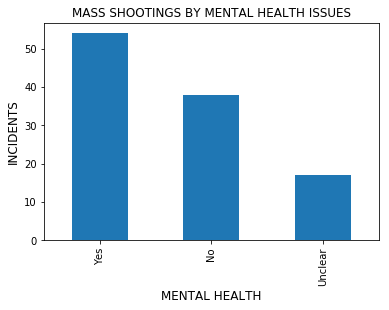

Yes        54
No         38
Unclear    17
Name: Mental Health Issues, dtype: int64


In [63]:
# Attacks by person with mental health issues

# Combine/clean mental health categories
mass['Mental Health Issues'].replace(['unknown', 'unclear', 'Unclear'], ['Unknown','Unclear', 'Unclear'], inplace=True)
mass['Mental Health Issues'].replace(['Unknown'], ['Unclear'], inplace=True)

mhlth = mass['Mental Health Issues'].value_counts()
mhlth.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.xlabel('MENTAL HEALTH', fontsize=12)
plt.ylabel('INCIDENTS', fontsize=12)
plt.title('MASS SHOOTINGS BY MENTAL HEALTH ISSUES', fontsize=12)
plt.show()

print(mhlth)

From this chart we can see shootings committed by people with known mental health issues (54) roughly equals those committed by people not known to have prior mental health issues (38). At first glance it is unclear if mental health plays a statistically significant role in mass shootings because there are many shootings by people not know to have prior mental health issues. Let's take a closer look by comparing fatalities and total victims to the mental health of the shooter.

-------------------------------------------------------------------------------

Null Hypothesis: There is no significant difference in mass shootings between people with mental health issues versus people not known to have mental health issues.

In [87]:
# Separate groups for people with known mental health issues and people with no known mental health issues

mass_gr1 = mass[mass["Mental Health Issues"] == "Yes"]
mass_gr2 = mass[mass["Mental Health Issues"] == "No"]

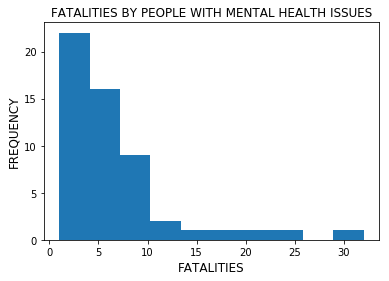

In [82]:
# Fatalities by people with mental health issues

plt.hist(mass_gr1['Fatalities'])
plt.xlabel('FATALITIES', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.title('FATALITIES BY PEOPLE WITH MENTAL HEALTH ISSUES', fontsize=12)
plt.show()

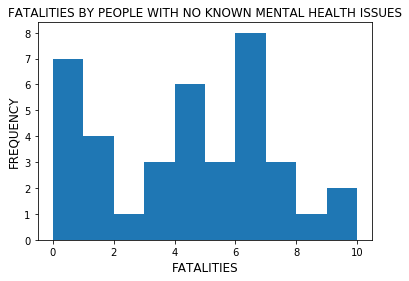

In [83]:
# Fatalities by people not known to have mental health issues

plt.hist(mass_gr2['Fatalities'])
plt.xlabel('FATALITIES', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.title('FATALITIES BY PEOPLE WITH NO KNOWN MENTAL HEALTH ISSUES', fontsize=12)
plt.show()

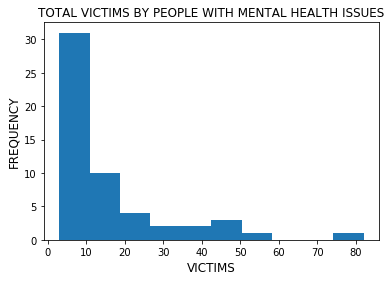

In [84]:
# Total victims of people with mental health issues

plt.hist(mass_gr1['Total victims'])
plt.xlabel('VICTIMS', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.title('TOTAL VICTIMS BY PEOPLE WITH MENTAL HEALTH ISSUES', fontsize=12)
plt.show()

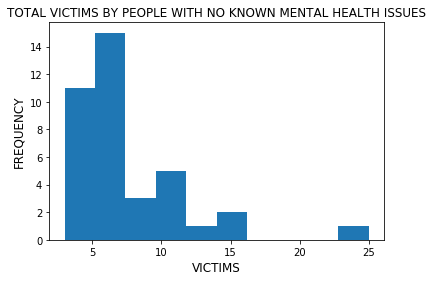

In [85]:
# Total victims of people not known to have mental health issues

plt.hist(mass_gr2['Total victims'])
plt.xlabel('VICTIMS', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.title('TOTAL VICTIMS BY PEOPLE WITH NO KNOWN MENTAL HEALTH ISSUES', fontsize=12)
plt.show()

Since the above four charts show non-normal distributions, we will use the Mann-Whitney U Test to compare results.

In [46]:
from scipy.stats import mannwhitneyu

s, p = mannwhitneyu(mass_gr1['Fatalities'], mass_gr2['Fatalities'])
print("Fatalities P-value: ", p)

s, p = mannwhitneyu(mass_gr1['Total victims'], mass_gr2['Total victims'])
print("Total victims P-value: ", p)

Fatalities P-value:  0.0198836653234754
Total victims P-value:  0.019128208502323905


Because the P-values are low and do not meet the 0.05 threshold, we can reject the initial null hypothesis that the difference is due to random sampling, and conclude instead that the populations are distinct. We can therefore assert that mental health can play a significant role in overall victims of mass shootings.

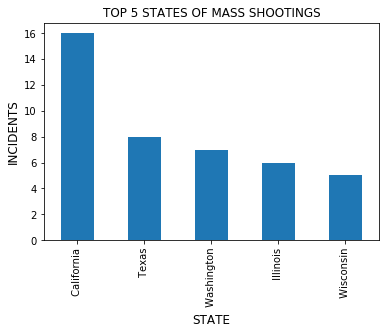

 California    16
 Texas          8
 Washington     7
 Illinois       6
 Wisconsin      5
Name: State, dtype: int64


In [64]:
# Top 5 states of shootings

# Separate cities and states in location column
mass['City'] = mass['Location'].str.rpartition(',')[0]
mass['State'] = mass['Location'].str.rpartition(',')[2]

sts_5 = mass['State'].value_counts()
sts_5 = sts_5.head()
#plt.figure(figsize=(8,6))
sts_5.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.xlabel('STATE', fontsize=12)
plt.ylabel('INCIDENTS', fontsize=12)
plt.title('TOP 5 STATES OF MASS SHOOTINGS', fontsize=12)
plt.show()

print(sts_5)

This charts shows the top five states where mass shootings have occurred. California leads with 16 shootings, followed by Texas (8), Washington (7), Illinois (6), and Wisconsin (5). This data is not normalized to population size, which could potentially yield different results.

In this section I will explore the gun laws of the top five states where mass shooting incidents have occurred. This information comes from www.gunstocarry.com. The following categories summarize how strict or loose the state's gun laws are followed by a star rating provided by the website. 1 star is the lowest rating (strict/least gun friendly), and 5 is the highest rating (loose/most gun friendly).

CALIFORNIA  
Carry permit required: Yes  
Registration required: Yes  
Open carry allowed: Only in rural areas  
Background check on private sales: No private sales allowed, only through licensed dealers  
Magazine size restriction: Yes  
Star rating: 1   

TEXAS  
Carry permit required: Handgun Yes, Long gun No  
Registration required: No  
Open carry allowed: Yes  
Background check on private sales: No  
Magazine size restriction: No  
Star rating: 4  

WASHINGTON  
Carry permit required: Handgun Yes, Long gun No  
Registration required: Handgun Yes, Long gun No  
Open carry allowed: Yes  
Background check on private sales: No private sales allowed, only through licensed dealers  
Magazine size restriction: No  
Star rating: 3  

Illinois   
Carry permit required: Handgun Yes, Long gun No  
Registration required: No  
Open carry allowed: No  
Background check on private sales: Yes    
Magazine size restriction: No  
Star rating: 2   

Wisconsin  
Carry permit required: Handgun Yes, Long gun No  
Registration required: No  
Open carry allowed: Yes  
Background check on private sales: No  
Magazine size restriction: No  
Star rating: 4  

-----------------------------------------------------

At first glance, given the limited information of the above gun laws, it is unclear if there is a correlation between loose gun laws and mass shootings. Gun laws in the top five states are pretty evenly mixed. The top two states where shootings have occurred are both the most strict and fairly loose in their gun laws. The following three states are evenly split, with Washington having moderate gun laws, Illinois mostly strict, and Wisconsin mostly loose. However, California has the strictest gun laws and also the most incidents. This could possibly be due to the fact that they have the biggest population of all the states in the U.S. In fact, the top two states with the most mass shooting incidents (California and Texas) are also the top two states with the highest populations, according to a 2015 Census Bureau report (https://www.census.gov/newsroom/press-releases/2015/cb15-215.html). 

I propose more detailed research be done by adding the variable of population and normalizing the incident data to get a clearer vision. It may paint a different picture if we were to rank states by incidents per 100,000 people, for example.  

---------------------------------------------------------------------------------------

TYPICAL SHOOTER PROFILE

From the above data we can reasonably conclude that a typical mass shooter is a white male. Even though the average age of a shooter is around 32 years old, there is a lot of variance in the age category. Mental illness does seem to play a role in predicting whether someone will turn out to be a shooter or not. Without normalizing the incident data, a shooting is more likely to occur in the more populated states. However, it is unlcear if that is strictly due to population size or some states are just more dangerous than others. 

---------------------------------------------------------------------------------------

PROPOSED FURTHER RESEARCH

1. Add population size variable and normalize incidents per 100,000 people to get a better picture of places more prone to shootings.

2. More detailed look into incidents by age and race combined. For example, is there a differnce in the average age of a shooter for whites and blacks?

3. After factoring in the above two proposals, relook at the states' gun laws to see how important their role is in preventing mass shootings.